# Malware classification system - Class classifier

In questa fase, ci concentreremo sull'analisi del traffico di rete di applicazioni Android malevoli con l'obiettivo di classificarne la tipologia tra **ransomware**, **adware**, **scareware** e **smsmalware**, utilizzando avanzati modelli di machine learning.

Questo compito ci sfida a creare modelli predittivi che possano imparare dai dati di traffico di rete e identificare i pattern distintivi associati a ciascuna categoria di malware. Sfruttando algoritmi sofisticati, come Support Vector Machine, Random Forest, Gradient Boosting e altri, possiamo ottenere modelli robusti in grado di riconoscere le diverse minacce di malware.

Questo tipo di ricerca può contribuire alla sicurezza digitale e alla protezione degli utenti Android, fornendo un potente strumento per il rilevamento tempestivo e accurato di applicazioni dannose. Attraverso l'analisi intelligente del traffico di rete, potremo identificare e affrontare le minacce in modo proattivo, aiutando a preservare l'integrità e la sicurezza dell'ecosistema delle applicazioni Android.

In [1]:
import pandas as pd
import os
import numpy as np
from pprint import pprint
from pathlib import Path
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def tryconvert(x, to_type, default):
  '''
  Try convert `x` to a type specified by `to_type` function. 
  Returns `default` value if casting is not possibile 
  '''
  try:
    return to_type(x)
  except:
    return default

def load_data(directory, nrows=None, usecols=None, converters=None, dtype=None):
# Read each CSV file in dir "path/to/root_dir"
    dfs = []
    for file in Path(directory).glob('**/*.csv'):
        dfs.append(pd.read_csv(file, nrows=nrows, usecols=usecols, converters=converters, dtype=dtype))
    # Put the dataframes to a single dataframe
    df = pd.concat(dfs, ignore_index=True)
    return df

malware_dir = os.path.join(os.getcwd(), 'dataset', 'Malware')

usecols = [" Total Length of Bwd Packets", " Fwd Packet Length Std", " Bwd Packet Length Min", " Bwd Packet Length Std", " Flow IAT Mean", " Flow IAT Min", "Init_Win_bytes_forward", " Init_Win_bytes_backward", " min_seg_size_forward", " Label"]

# Define column datatype when reading CSVs
converters = dict(itertools.product(usecols, [lambda x: tryconvert(x, float, np.nan)]))
converters[" Label"] = lambda x: x

# Load dataset
N_rows = None
df = load_data(malware_dir, nrows=N_rows, usecols=usecols, converters=converters)

# shuffle dataset
# df = df.sample(frac=1).reset_index(drop=True)

# trim columns labels
df.columns = df.columns.str.strip()

# Drop rows which contain NaN values
df.dropna(inplace=True)

# Drop "MALWARE" or NaN rows
df.drop(df[(df["Label"] == "") | (df['Label'] == "MALWARE") | (df["Label"] == "BENIGN")].index, inplace = True)

df["Label"] = df["Label"].apply(lambda x: x.split("_")[0])
df

,Total Length of Bwd Packets,Fwd Packet Length Std,Bwd Packet Length Min,Bwd Packet Length Std,Flow IAT Mean,Flow IAT Min,Init_Win_bytes_forward,Init_Win_bytes_backward,min_seg_size_forward,Label
0,212.0,567.535315,0.0,122.398257,1.521164e+05,146.0,65535.0,107.0,32.0,SMSMALWARE
1,0.0,29.698485,0.0,0.000000,4.000000e+01,40.0,121.0,-1.0,32.0,SMSMALWARE
2,0.0,24.248711,0.0,0.000000,3.505000e+02,317.0,7651.0,-1.0,32.0,SMSMALWARE
3,212.0,567.535315,0.0,122.398257,1.633322e+05,45.0,65535.0,107.0,32.0,SMSMALWARE
4,0.0,16.263456,0.0,0.000000,2.500000e+01,25.0,1419.0,-1.0,32.0,SMSMALWARE
...,...,...,...,...,...,...,...,...,...,...
1411059,103.0,0.000000,103.0,0.000000,4.001670e+05,400167.0,-1.0,-1.0,32.0,ADWARE
1411060,0.0,17.897858,0.0,0.000000,2.002421e+07,22144.0,468.0,0.0,32.0,ADWARE
1411061,0.0,0.000000,0.0,0.000000,3.357000e+03,1739.0,131.0,1432.0,20.0,ADWARE
1411062,226.0,0.000000,226.0,0.000000,9.228800e+04,92288.0,-1.0,-1.0,32.0,ADWARE


# Data information

In [3]:
df.shape

(1403530, 10)

In [4]:
df["Label"].unique()

array(['SMSMALWARE', 'SCAREWARE', 'RANSOMWARE', 'ADWARE'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1403530 entries, 0 to 1411063
Data columns (total 10 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Total Length of Bwd Packets  1403530 non-null  float64
 1   Fwd Packet Length Std        1403530 non-null  float64
 2   Bwd Packet Length Min        1403530 non-null  float64
 3   Bwd Packet Length Std        1403530 non-null  float64
 4   Flow IAT Mean                1403530 non-null  float64
 5   Flow IAT Min                 1403530 non-null  float64
 6   Init_Win_bytes_forward       1403530 non-null  float64
 7   Init_Win_bytes_backward      1403530 non-null  float64
 8   min_seg_size_forward         1403530 non-null  float64
 9   Label                        1403530 non-null  object 
dtypes: float64(9), object(1)
memory usage: 117.8+ MB


In [6]:
df.describe()

,Total Length of Bwd Packets,Fwd Packet Length Std,Bwd Packet Length Min,Bwd Packet Length Std,Flow IAT Mean,Flow IAT Min,Init_Win_bytes_forward,Init_Win_bytes_backward,min_seg_size_forward
count,1.403530e+06,1.403530e+06,1.403530e+06,1.403530e+06,1.403530e+06,1.403530e+06,1.403530e+06,1.403530e+06,1.403530e+06
mean,1.397915e+04,8.120232e+01,2.508724e+01,1.272543e+02,3.075395e+06,1.897294e+06,2.348370e+04,2.088943e+03,-1.338401e+04
std,3.416605e+05,1.647547e+02,7.170995e+01,2.330313e+02,8.134561e+06,7.521742e+06,3.076905e+04,8.696266e+03,4.220028e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-4.300000e+01,-1.000000e+00,-1.000000e+00,-1.395063e+09
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.418154e+04,3.000000e+01,2.900000e+01,-1.000000e+00,2.000000e+01
50%,3.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.023876e+05,3.150000e+03,1.506000e+03,-1.000000e+00,3.200000e+01
75%,3.260000e+02,9.825000e+01,0.000000e+00,1.096966e+02,2.031699e+06,1.242250e+05,6.553500e+04,3.490000e+02,3.200000e+01
max,1.503985e+08,4.672402e+03,1.460000e+03,1.335115e+03,1.199514e+08,1.199514e+08,6.553500e+04,6.553500e+04,1.705249e+08


# Data visualization

<AxesSubplot: xlabel='Label', ylabel='# occurrences'>

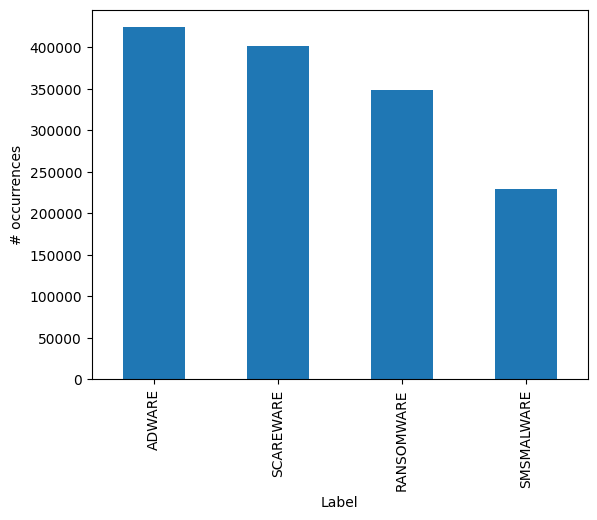

In [7]:
df["Label"].value_counts().plot(
    kind="bar",
    xlabel="Label",
    ylabel="# occurrences"
)

<AxesSubplot: ylabel='Label'>

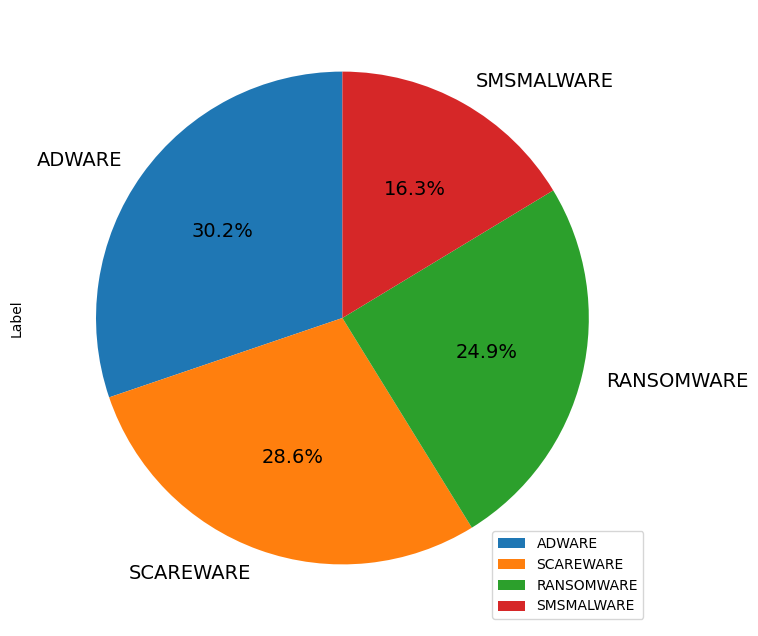

In [8]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

df["Label"].value_counts().plot(
    kind="pie",
    ax=ax,
    autopct='%1.1f%%',
    startangle=90,
    shadow=False,
    legend = True,
    fontsize=14
)

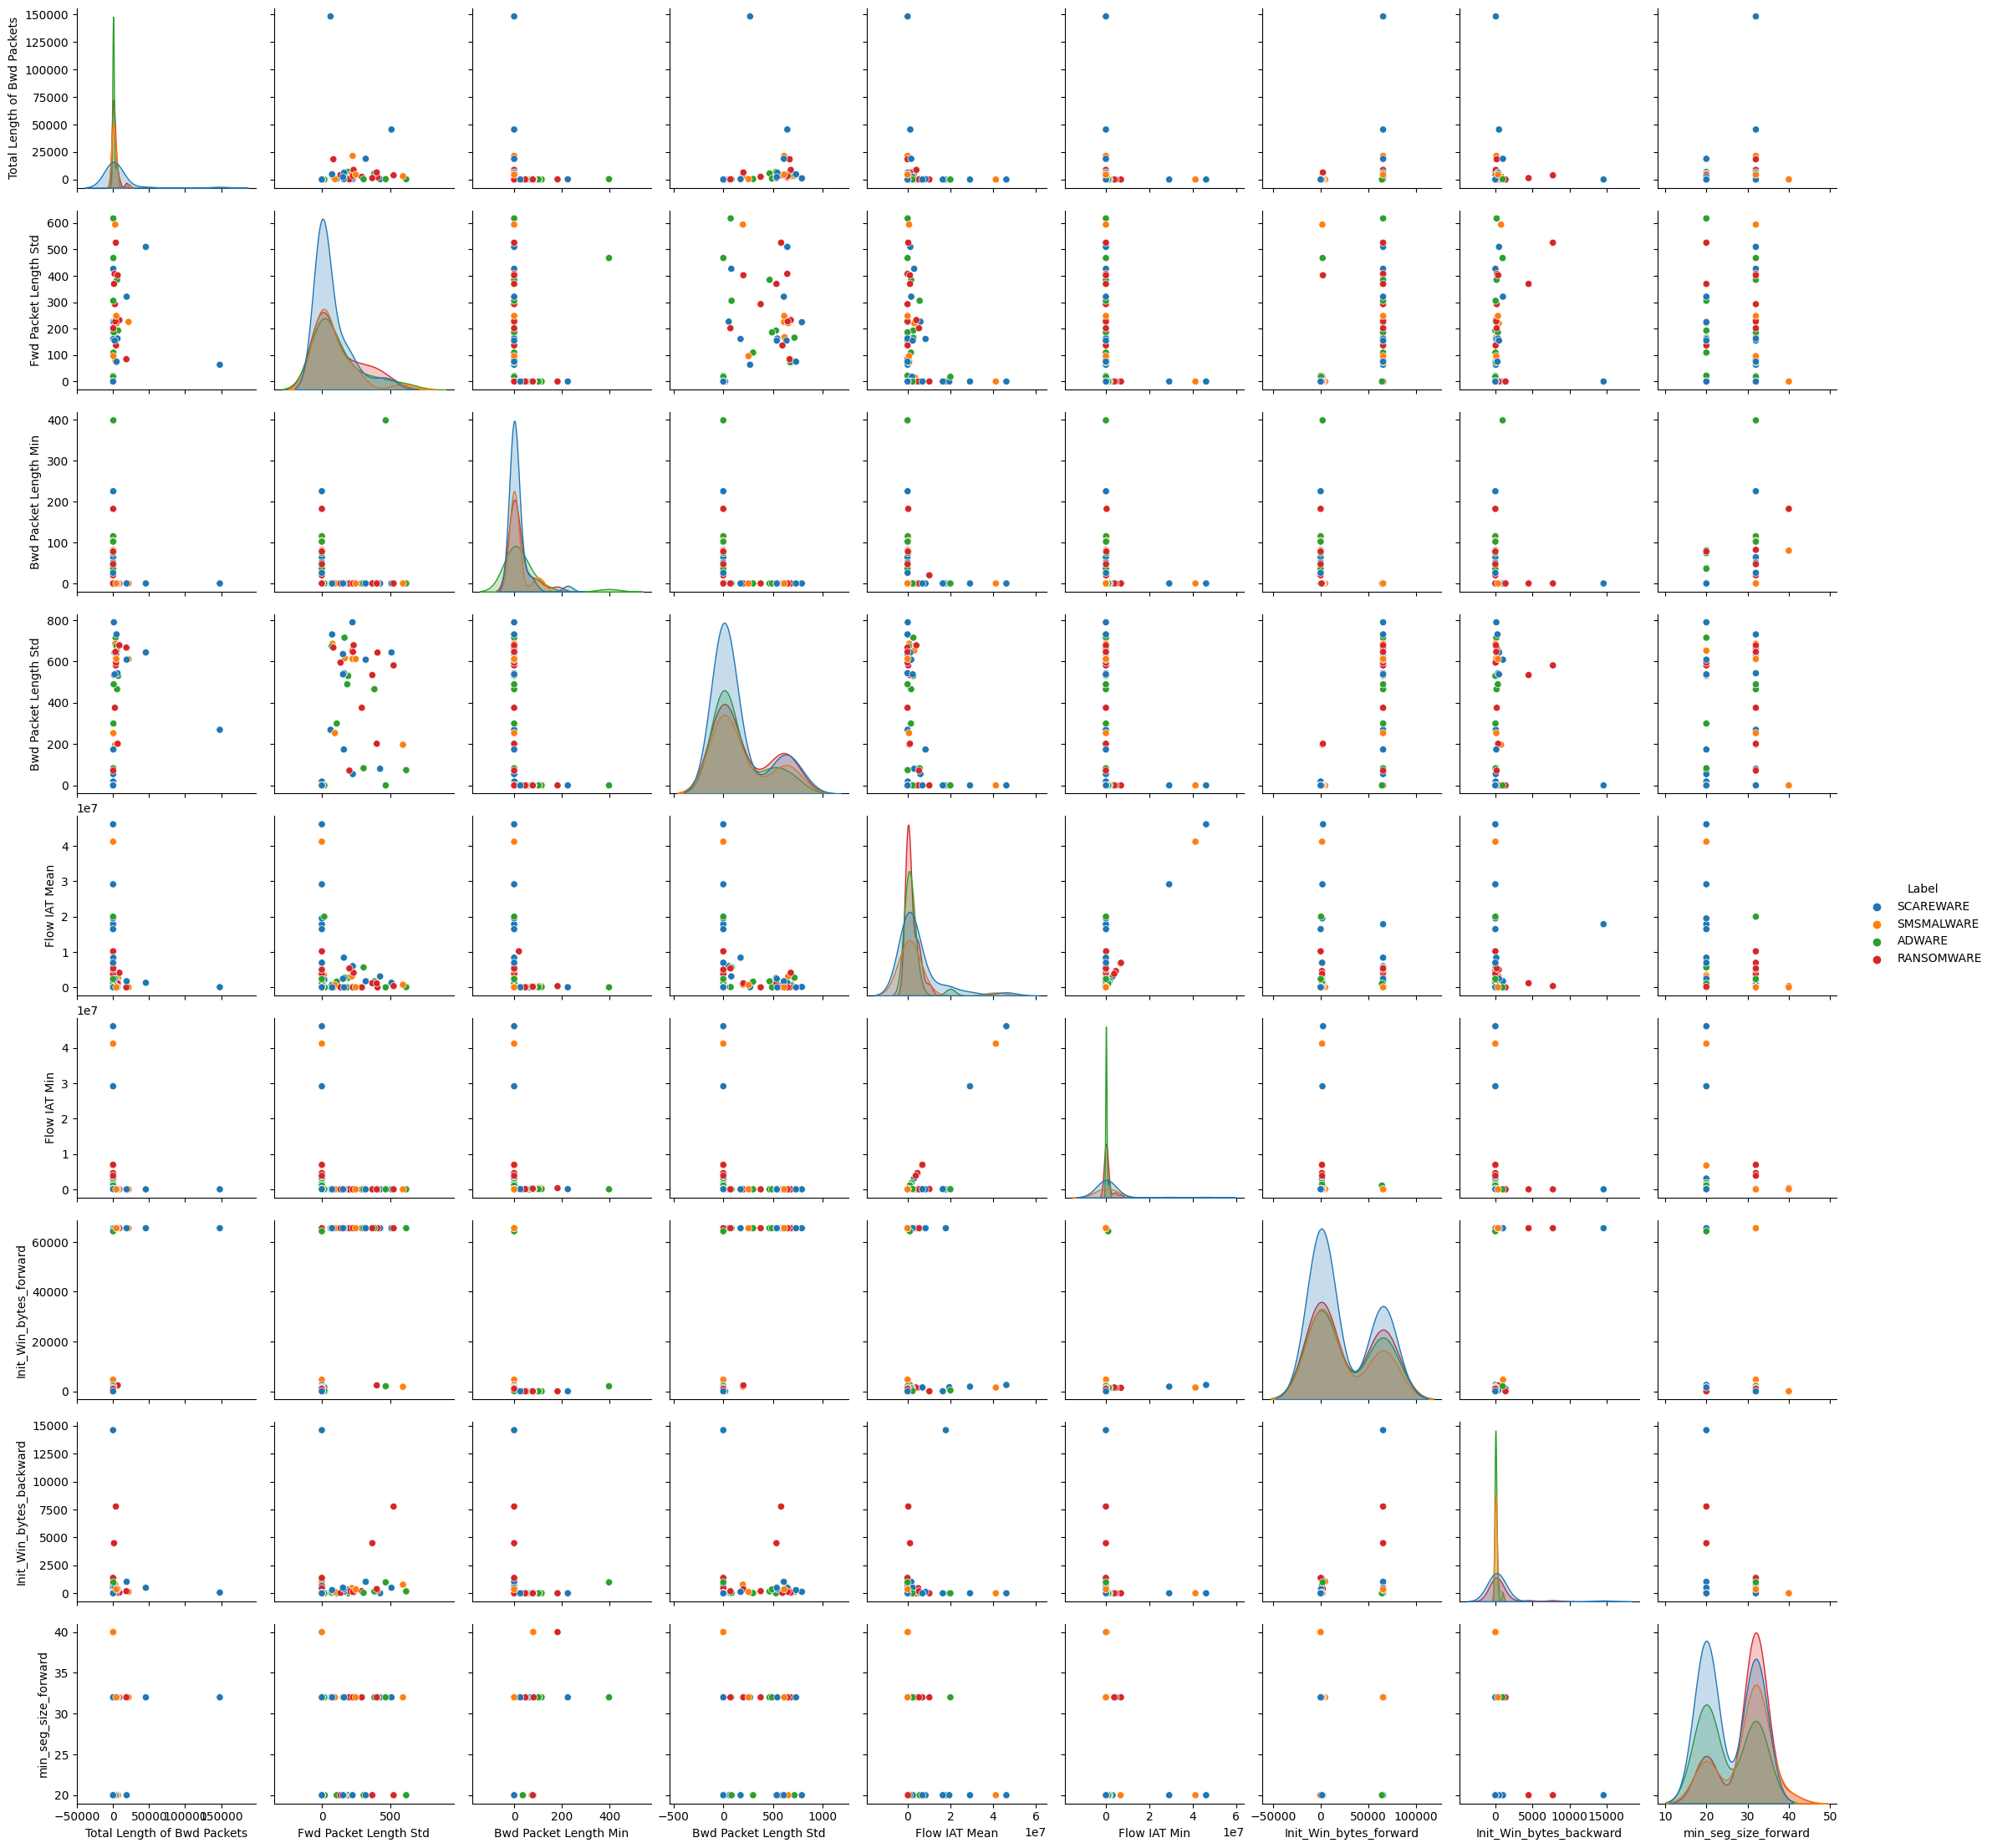

In [9]:
df = df.sample(frac=1).reset_index(drop=True)
sns.pairplot(df.iloc[:100], hue="Label")

# Data Preprocessing

In [10]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

def data_preprocessing(df: pd.DataFrame) -> pd.DataFrame:
    if "Source IP" in df.columns:
        df['Source IP'] = label_encoder.fit_transform(df['Source IP'])
    if "Flow ID" in df.columns:
        df['Flow ID'] = label_encoder.fit_transform(df['Flow ID'])
    if "Destination IP" in df.columns:
        df['Destination IP'] = label_encoder.fit_transform(df['Destination IP'])

    if "Timestamp" in df.columns:
        # drop column Timestamp
        df = df.drop(['Timestamp'], axis=1)    
    return df

df = data_preprocessing(df)
df

,Total Length of Bwd Packets,Fwd Packet Length Std,Bwd Packet Length Min,Bwd Packet Length Std,Flow IAT Mean,Flow IAT Min,Init_Win_bytes_forward,Init_Win_bytes_backward,min_seg_size_forward,Label
0,0.0,0.000000,0.0,0.000000,2.916649e+07,29166486.0,1871.0,-1.0,20.0,SCAREWARE
1,0.0,0.000000,0.0,0.000000,4.122627e+07,41226274.0,1506.0,-1.0,20.0,SMSMALWARE
2,64.0,0.000000,64.0,0.000000,1.945000e+03,1945.0,-1.0,-1.0,32.0,SCAREWARE
3,294.0,426.705363,0.0,80.515216,3.105446e+06,101.0,65535.0,9.0,32.0,SCAREWARE
4,6917.0,192.939395,0.0,530.022065,2.681816e+06,2.0,65535.0,0.0,20.0,ADWARE
...,...,...,...,...,...,...,...,...,...,...
1403525,149.0,0.000000,149.0,0.000000,8.325800e+04,83258.0,-1.0,-1.0,40.0,SMSMALWARE
1403526,5333.0,167.230978,0.0,653.895071,3.114939e+06,7.0,65535.0,456.0,20.0,RANSOMWARE
1403527,0.0,0.000000,0.0,0.000000,6.424352e+06,6424352.0,1386.0,-1.0,20.0,SMSMALWARE
1403528,0.0,0.000000,0.0,0.000000,8.224900e+06,8224900.0,1386.0,-1.0,32.0,SCAREWARE


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['Label'], axis=1),
    df['Label'],
    test_size=0.4,
    random_state=42
)

#p = 0.8
#train_df, test_df = df[:int(len(df)*p)], df[int(len(df)*p):]

X_train.shape, X_test.shape

((842118, 9), (561412, 9))

In [12]:
X_train.head()

,Total Length of Bwd Packets,Fwd Packet Length Std,Bwd Packet Length Min,Bwd Packet Length Std,Flow IAT Mean,Flow IAT Min,Init_Win_bytes_forward,Init_Win_bytes_backward,min_seg_size_forward
563595,0.0,0.000000,0.0,0.000000,42736.000000,42736.0,115.0,1369.0,20.0
1156518,0.0,21.920310,0.0,0.000000,53.000000,53.0,129.0,-1.0,32.0
1340768,16712.0,352.335174,0.0,588.729431,634652.224138,11.0,65535.0,268.0,20.0
1402778,1156.0,249.680081,0.0,396.215430,330393.916667,128.0,65535.0,179.0,32.0
748724,0.0,0.000000,0.0,0.000000,252.000000,252.0,1386.0,-1.0,32.0


In [13]:
y_train.head()

563595     SMSMALWARE
1156518     SCAREWARE
1340768        ADWARE
1402778        ADWARE
748724         ADWARE
Name: Label, dtype: object

# Valutazione

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(
        xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
        xticklabels=classes,
        yticklabels=classes,
        title=title,
        ylabel='True label',
        xlabel='Predicted label'
    )
    plt.setp(
        ax.get_xticklabels(),
        rotation=45,
        ha='right',
        rotation_mode='anchor'
    )
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt), ha='center', va='center', color='white' if cm[i, j] > thresh else 'black')
    fig.tight_layout()
    return ax

def valuate(clf, x_test, y_test):
    y_pred = clf.predict(x_test)
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred, classes=clf.classes_, title='Confusion matrix')


# Decision Tree

In [15]:
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier()
decision_tree = decision_tree.fit(X_train, y_train)

[Text(0.5, 0.875, 'min_seg_size_forward <= 25.0\ngini = 0.739\nsamples = 842118\nvalue = [254539, 209419, 240479, 137681]\nclass = ADWARE'),
 Text(0.25, 0.625, 'Total Length of Bwd Packets <= 1017306.5\ngini = 0.725\nsamples = 359471\nvalue = [124858, 81077, 105376, 48160]\nclass = ADWARE'),
 Text(0.125, 0.375, 'Flow IAT Min <= 1289743.0\ngini = 0.725\nsamples = 357143\nvalue = [122886, 80975, 105216, 48066]\nclass = ADWARE'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Init_Win_bytes_backward <= 59.5\ngini = 0.274\nsamples = 2328\nvalue = [1972, 102, 160, 94]\nclass = ADWARE'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Init_Win_bytes_backward <= 329.5\ngini = 0.744\nsamples = 482647\nvalue = [129681, 128342, 135103, 89521]\nclass = SCAREWARE'),
 Text(0.625, 0.375, 'Init_Win_bytes_backward <= 169.5\ngini = 0.742\nsamples = 352184\nvalue = [93282, 102307, 94721, 61874]\nclass =

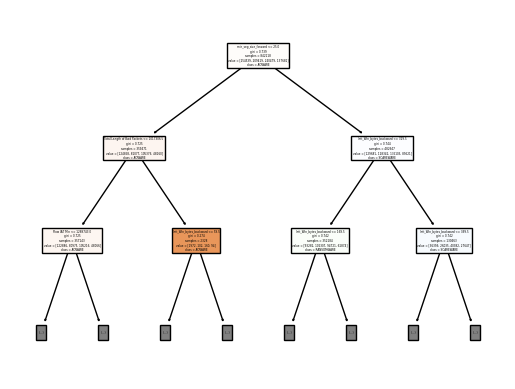

In [16]:
tree.plot_tree(decision_tree, filled=True, class_names=decision_tree.classes_, feature_names=X_train.columns, max_depth=2)

              precision    recall  f1-score   support

      ADWARE       0.54      0.53      0.53    169608
  RANSOMWARE       0.56      0.54      0.55    139524
   SCAREWARE       0.42      0.44      0.43    160686
  SMSMALWARE       0.34      0.34      0.34     91594

    accuracy                           0.47    561412
   macro avg       0.46      0.46      0.46    561412
weighted avg       0.48      0.47      0.48    561412



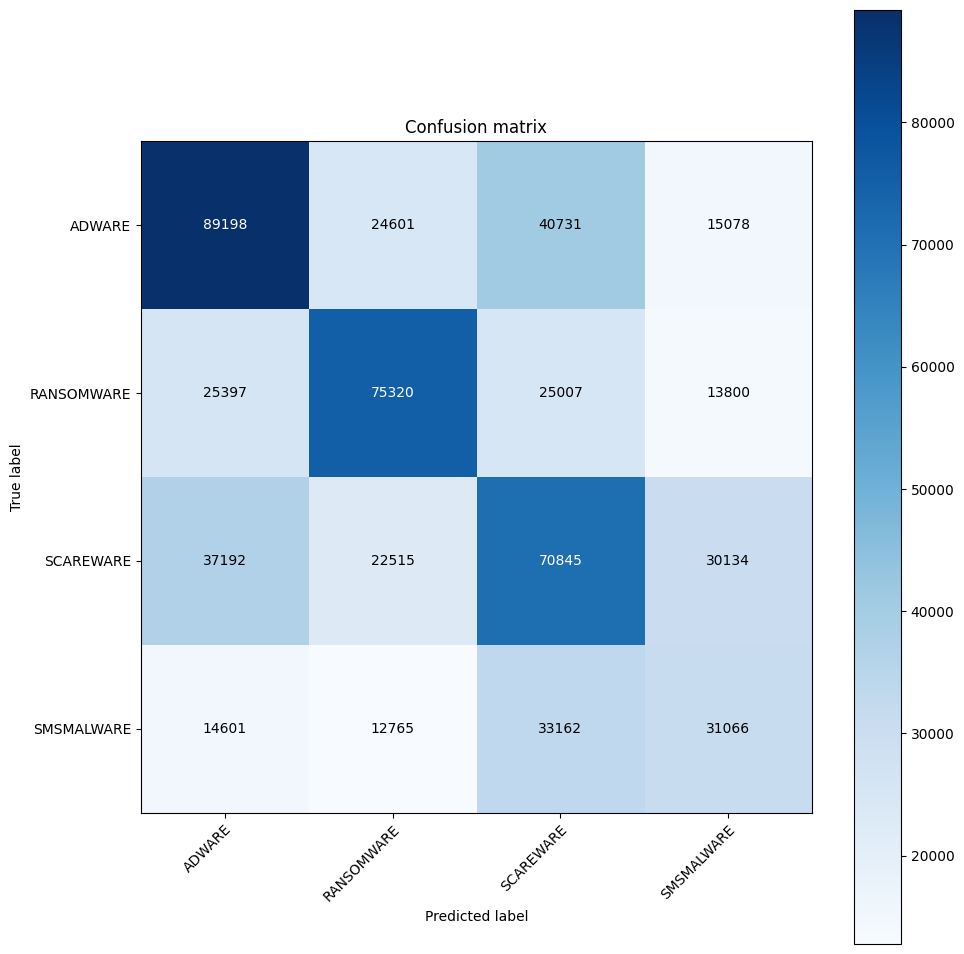

In [17]:
valuate(decision_tree, X_test, y_test)

In [18]:
from sklearn.model_selection import cross_validate

scores = cross_validate(
    decision_tree,
    X_train,
    y_train,
    cv=10,
    scoring=['accuracy', 'precision_macro', 'recall_macro']
)

In [21]:
print(f'{10}-fold cross validation:')
# print('Accuracy: %0.2f (+/- %0.2f)' % (scores['test_precision_macro'].mean(), scores['test_precision_macro'].std() * 2))
print('Precision: %0.2f (+/- %0.2f)' % (scores['test_precision_macro'].mean(), scores['test_precision_macro'].std() * 2))
print('Recall: %0.2f (+/- %0.2f)' % (scores['test_recall_macro'].mean(), scores['test_recall_macro'].std() * 2))

10-fold cross validation:
Precision: 0.46 (+/- 0.00)
Recall: 0.46 (+/- 0.00)


# KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier

N = 1_000
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train[:N], y_train[:N])

KNeighborsClassifier(n_neighbors=3)

              precision    recall  f1-score   support

      ADWARE       0.32      0.55      0.41    169608
  RANSOMWARE       0.28      0.24      0.26    139524
   SCAREWARE       0.29      0.20      0.24    160686
  SMSMALWARE       0.18      0.07      0.10     91594

    accuracy                           0.30    561412
   macro avg       0.27      0.27      0.25    561412
weighted avg       0.28      0.30      0.27    561412



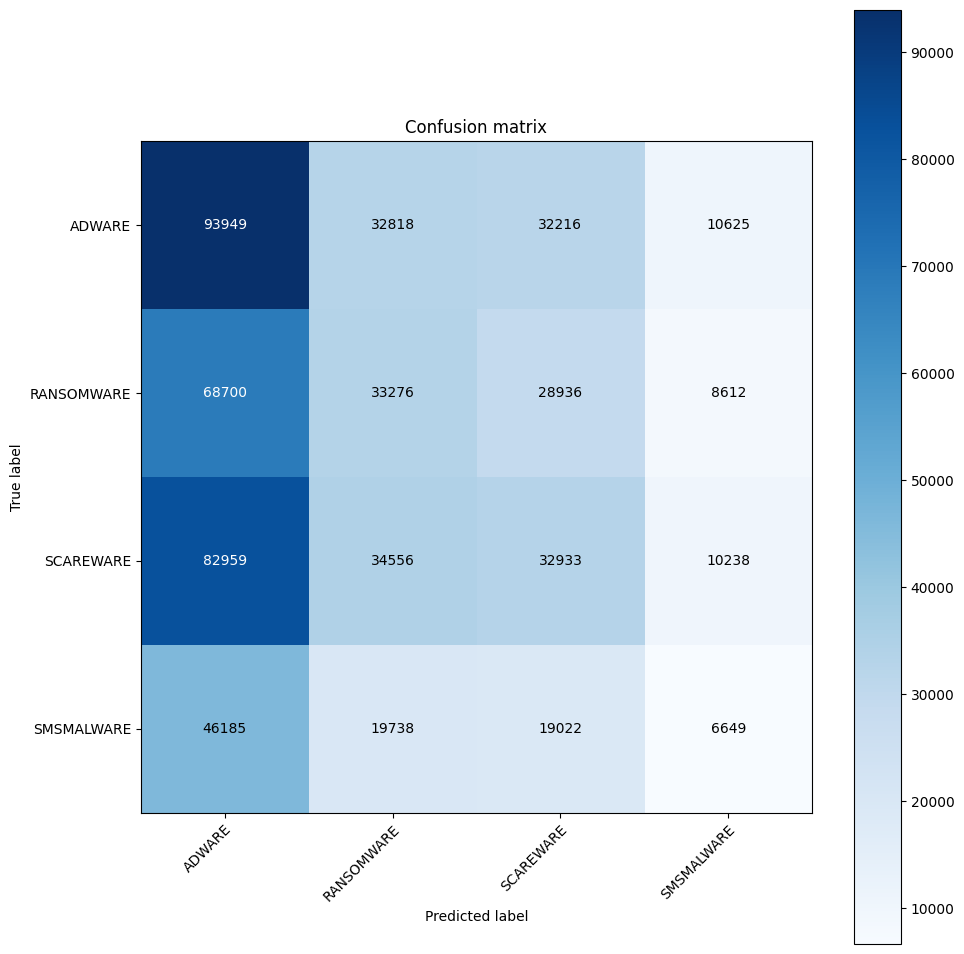

In [20]:
valuate(knn, X_test, y_test)

# Support Vector Machine

In [23]:
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay

C = 2.0
models = (
    # svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=1000, dual=True),
    svm.SVC(kernel="rbf", gamma=0.7, C=C, max_iter=1000),
    #svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = [clf.fit(X_train[:10_000], y_train[:10_000]) for clf in models]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


LinearSVC:
              precision    recall  f1-score   support

      ADWARE       0.39      0.07      0.11      1239
  RANSOMWARE       1.00      0.00      0.00       981
   SCAREWARE       0.29      0.48      0.36      1117
  SMSMALWARE       0.16      0.49      0.25       663

    accuracy                           0.23      4000
   macro avg       0.46      0.26      0.18      4000
weighted avg       0.48      0.23      0.18      4000

SVC:
              precision    recall  f1-score   support

      ADWARE       0.43      0.01      0.01      1239
  RANSOMWARE       0.25      0.01      0.01       981
   SCAREWARE       0.10      0.00      0.00      1117
  SMSMALWARE       0.17      0.99      0.28       663

    accuracy                           0.17      4000
   macro avg       0.24      0.25      0.08      4000
weighted avg       0.25      0.17      0.05      4000



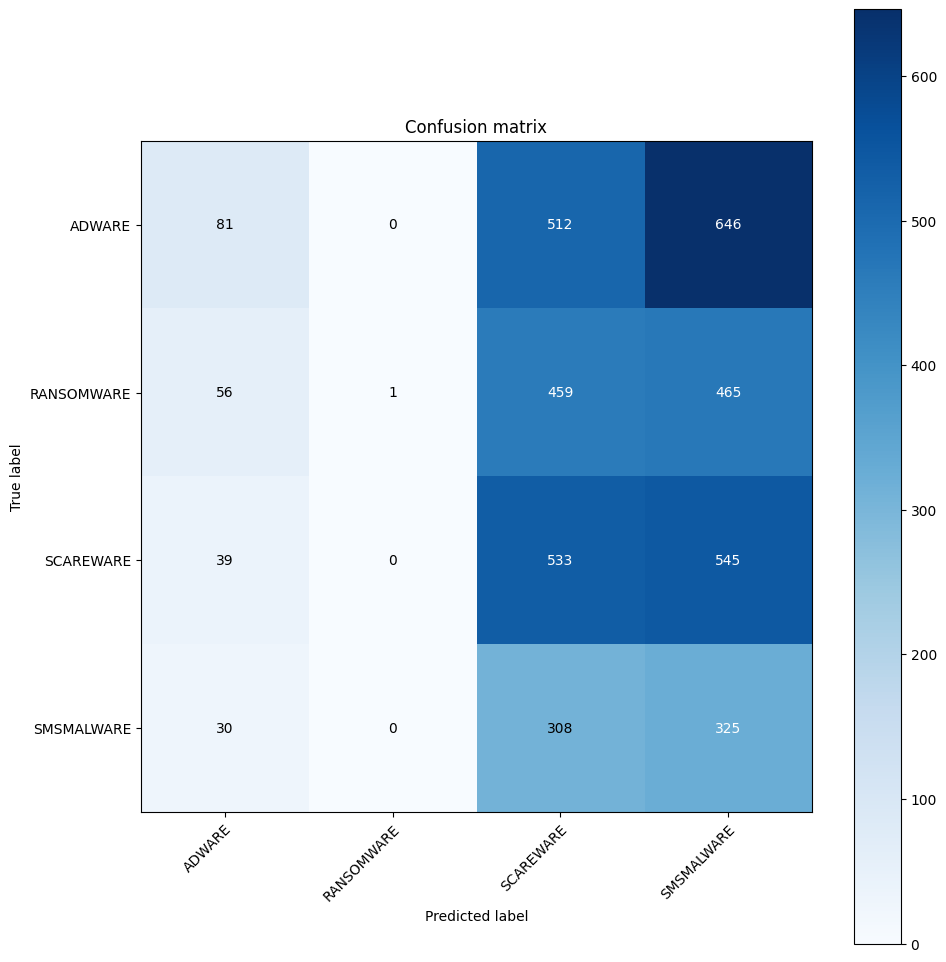

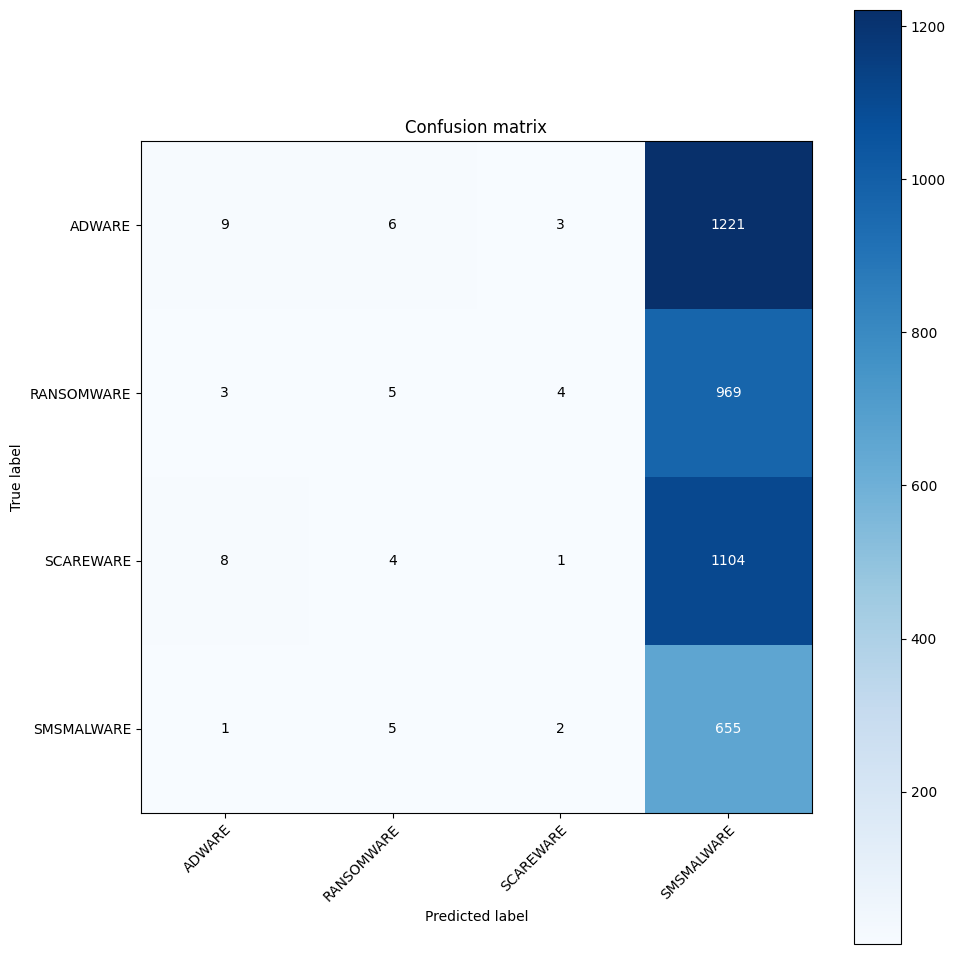

In [24]:
# valuate models

for clf in models:
    # print scores 
    print(f'{clf.__class__.__name__}:')
    valuate(clf, X_test[:4_000], y_test[:4_000])

# Softmax Regression

In [25]:
from sklearn.linear_model import LogisticRegression

logistic_classifier = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

              precision    recall  f1-score   support

      ADWARE       0.31      0.88      0.46    169608
  RANSOMWARE       0.00      0.00      0.00    139524
   SCAREWARE       0.30      0.13      0.18    160686
  SMSMALWARE       0.14      0.01      0.02     91594

    accuracy                           0.31    561412
   macro avg       0.19      0.26      0.17    561412
weighted avg       0.20      0.31      0.19    561412



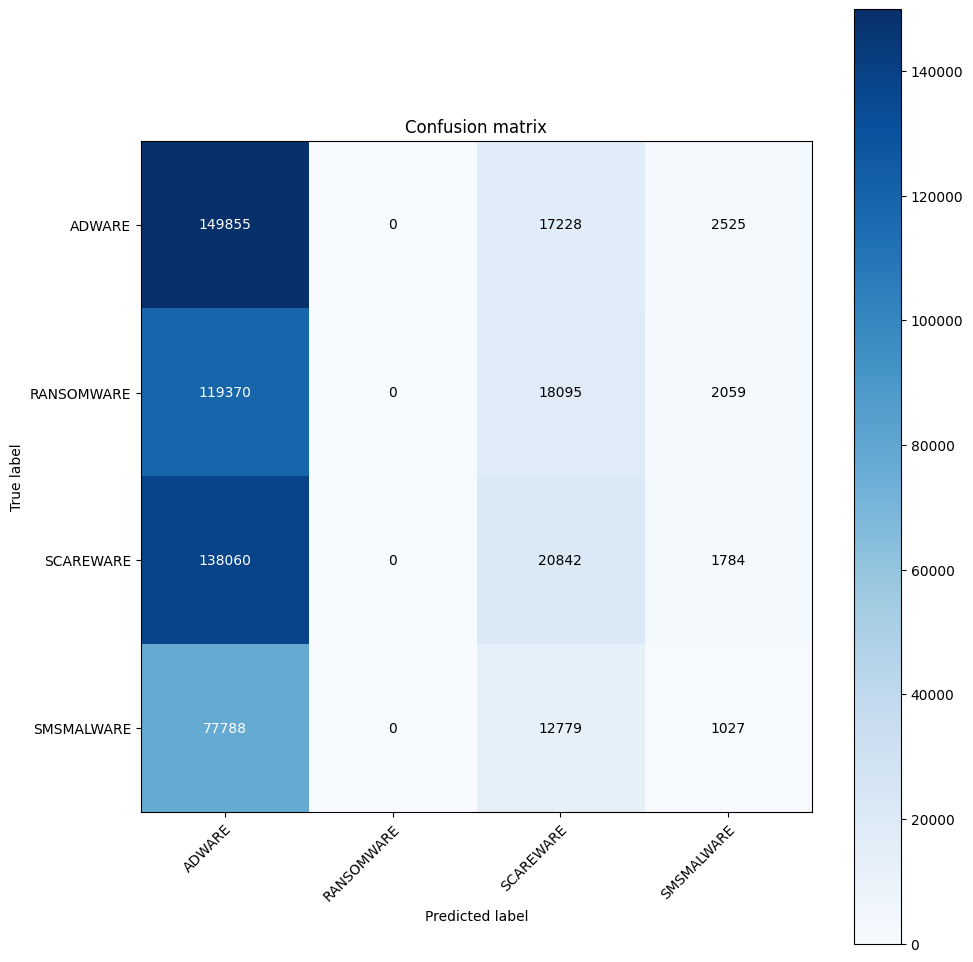

In [26]:
valuate(logistic_classifier, X_test, y_test)

# Gaussian Discriminant Analysis

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_classifier = LinearDiscriminantAnalysis().fit(X_train, y_train)

              precision    recall  f1-score   support

      ADWARE       0.42      0.20      0.27       420
  RANSOMWARE       0.45      0.05      0.08       411
   SCAREWARE       0.29      0.72      0.42       429
  SMSMALWARE       0.29      0.27      0.28       440

    accuracy                           0.31      1700
   macro avg       0.36      0.31      0.26      1700
weighted avg       0.36      0.31      0.26      1700



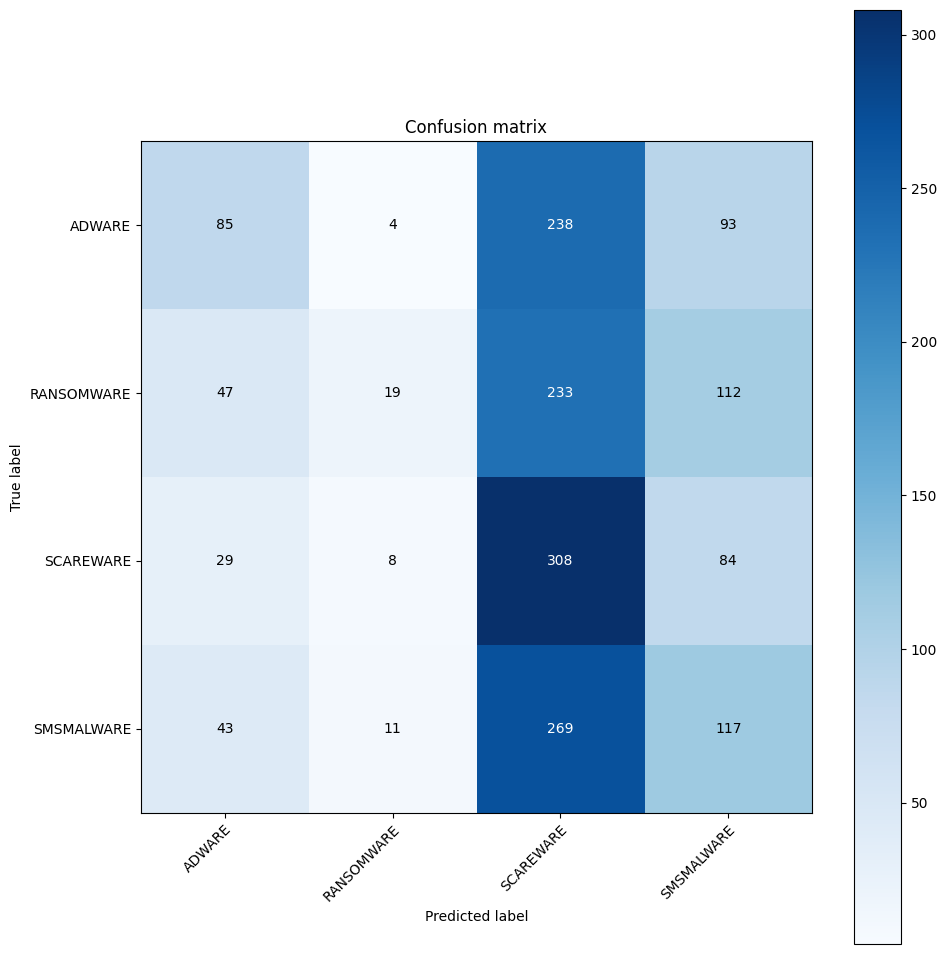

In [40]:
valuate(lda_classifier, X_test, y_test)

# MultiLayer Perceptron

In [46]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=32)
# X_train_reduced = pca.fit_transform(X_train)
# X_test_reduced = pca.transform(X_test)

In [35]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cpu


In [36]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encoding(y):
    y = y.values.reshape(-1, 1)
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit(y)
    y = ohe.transform(y)
    return y


In [43]:
from torch import nn

class MultiClassNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(9, 16)
        self.act = nn.ReLU()
        self.output = nn.Linear(16, 4)

    def forward(self, x):
        x = self.act(self.hidden(x))
        x = self.output(x)
        return x


![](./img/nn-category.png)

In [38]:
X_train.values

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.15000000e+02,  1.36900000e+03,  2.00000000e+01],
       [ 0.00000000e+00,  2.19203102e+01,  0.00000000e+00, ...,
         1.29000000e+02, -1.00000000e+00,  3.20000000e+01],
       [ 1.67120000e+04,  3.52335174e+02,  0.00000000e+00, ...,
         6.55350000e+04,  2.68000000e+02,  2.00000000e+01],
       ...,
       [ 1.76000000e+02,  0.00000000e+00,  1.76000000e+02, ...,
        -1.00000000e+00, -1.00000000e+00,  4.00000000e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         6.55350000e+04,  6.00000000e+00,  2.00000000e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.00000000e+00, -1.00000000e+00,  0.00000000e+00]])

In [39]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(one_hot_encoding(y_train), dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(one_hot_encoding(y_test), dtype=torch.float32)

In [44]:
import copy
import tqdm
from torch import optim

model = MultiClassNN()

# loss metric and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# prepare model and training parameters
n_epochs = 8
batch_size = 200
batches_per_epoch = len(X_train) // batch_size

best_acc = - np.inf   # init to negative infinity
best_weights = None
train_loss_hist = []
train_acc_hist = []
test_loss_hist = []
test_acc_hist = []

# training loop
for epoch in range(n_epochs):
    epoch_loss = []
    epoch_acc = []
    # set model in training mode and run through each batch
    model.train()
    with tqdm.trange(batches_per_epoch, unit="batch", mininterval=0) as bar:
        bar.set_description(f"Epoch {epoch}")
        for i in bar:
            # take a batch
            start = i * batch_size
            X_batch = X_train_tensor[start:start+batch_size]
            y_batch = y_train_tensor[start:start+batch_size]

            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            
            # backward pass
            optimizer.zero_grad()
            loss.backward()

            # update weights
            optimizer.step()

            # compute and store metrics
            acc = (torch.argmax(y_pred, 1) == torch.argmax(y_batch, 1)).float().mean()
            epoch_loss.append(float(loss))
            epoch_acc.append(float(acc))
            bar.set_postfix(
                loss=float(loss),
                acc=float(acc)
            )

    # set model in evaluation mode and run through the test set
    model.eval()
    y_pred = model(X_test_tensor)
    ce = loss_fn(y_pred, y_test_tensor)
    acc = (torch.argmax(y_pred, 1) == torch.argmax(y_test_tensor, 1)).float().mean()
    ce = float(ce)
    acc = float(acc)
    train_loss_hist.append(np.mean(epoch_loss))
    train_acc_hist.append(np.mean(epoch_acc))
    test_loss_hist.append(ce)
    test_acc_hist.append(acc)
    if acc > best_acc:
        best_acc = acc
        best_weights = copy.deepcopy(model.state_dict())
    print(f"Epoch {epoch} validation: Cross-entropy={ce:.2f}, Accuracy={acc*100:.1f}%")

# Restore best model
model.load_state_dict(best_weights)

Epoch 0: 100%|██████████| 4210/4210 [00:09<00:00, 464.82batch/s, acc=0.29, loss=2.47e+3] 


Epoch 0 validation: Cross-entropy=4008.20, Accuracy=28.4%


Epoch 1: 100%|██████████| 4210/4210 [00:11<00:00, 381.30batch/s, acc=0.345, loss=682]    


Epoch 1 validation: Cross-entropy=1935.03, Accuracy=29.6%


Epoch 2: 100%|██████████| 4210/4210 [00:10<00:00, 384.30batch/s, acc=0.285, loss=1.22e+3]


Epoch 2 validation: Cross-entropy=2236.95, Accuracy=28.8%


Epoch 3: 100%|██████████| 4210/4210 [00:10<00:00, 389.66batch/s, acc=0.35, loss=515]     


Epoch 3 validation: Cross-entropy=923.20, Accuracy=29.0%


Epoch 4: 100%|██████████| 4210/4210 [00:10<00:00, 404.56batch/s, acc=0.325, loss=543]    


Epoch 4 validation: Cross-entropy=880.04, Accuracy=27.4%


Epoch 5: 100%|██████████| 4210/4210 [00:10<00:00, 413.77batch/s, acc=0.38, loss=229]     


Epoch 5 validation: Cross-entropy=792.35, Accuracy=29.2%


Epoch 6: 100%|██████████| 4210/4210 [00:10<00:00, 412.58batch/s, acc=0.3, loss=750]      


Epoch 6 validation: Cross-entropy=1307.55, Accuracy=19.0%


Epoch 7: 100%|██████████| 4210/4210 [00:10<00:00, 391.04batch/s, acc=0.295, loss=382]    


Epoch 7 validation: Cross-entropy=901.59, Accuracy=23.3%


<All keys matched successfully>

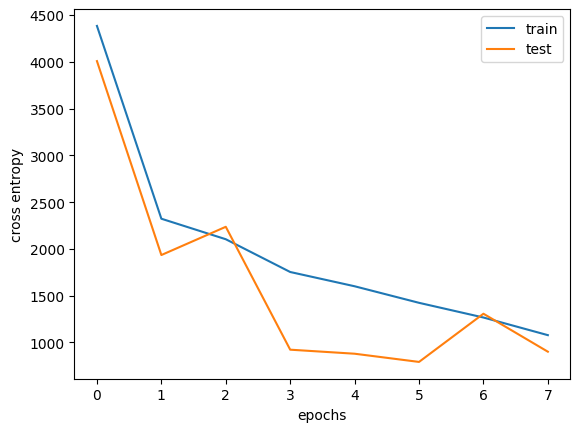

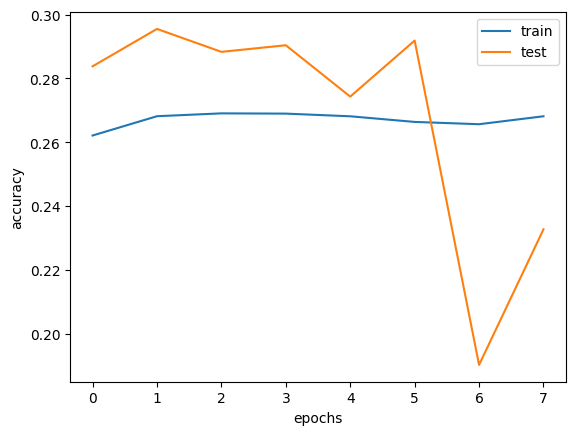

In [45]:

# Plot the loss and accuracy
plt.plot(train_loss_hist, label="train")
plt.plot(test_loss_hist, label="test")
plt.xlabel("epochs")
plt.ylabel("cross entropy")
plt.legend()
plt.show()

plt.plot(train_acc_hist, label="train")
plt.plot(test_acc_hist, label="test")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()